In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium 
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Important
In order to use run this data you must download the data sets from the following 3 links and store them in the same folder as your notebook

https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if
https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3
https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d

In [38]:
#importing datasets
df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
df_people = pd.read_csv('Traffic_Crashes_-_People.csv')
df_vehicles = pd.read_csv('Traffic_Crashes_-_Vehicles.csv')
df.head()

/Users/deja/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/deja/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN


In [39]:
df_people.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [40]:
df_vehicles.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212.0,NaN,BUICK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567797 entries, 0 to 567796
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                567797 non-null  object 
 1   RD_NO                          563961 non-null  object 
 2   CRASH_DATE_EST_I               42926 non-null   object 
 3   CRASH_DATE                     567797 non-null  object 
 4   POSTED_SPEED_LIMIT             567797 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         567797 non-null  object 
 6   DEVICE_CONDITION               567797 non-null  object 
 7   WEATHER_CONDITION              567797 non-null  object 
 8   LIGHTING_CONDITION             567797 non-null  object 
 9   FIRST_CRASH_TYPE               567797 non-null  object 
 10  TRAFFICWAY_TYPE                567797 non-null  object 
 11  LANE_CNT                       198975 non-null  float64
 12  ALIGNMENT                     

In [42]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251211 entries, 0 to 1251210
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1251211 non-null  object 
 1   PERSON_TYPE            1251211 non-null  object 
 2   CRASH_RECORD_ID        1251211 non-null  object 
 3   RD_NO                  1242411 non-null  object 
 4   VEHICLE_ID             1226460 non-null  float64
 5   CRASH_DATE             1251211 non-null  object 
 6   SEAT_NO                255463 non-null   float64
 7   CITY                   918813 non-null   object 
 8   STATE                  929935 non-null   object 
 9   ZIPCODE                838905 non-null   object 
 10  SEX                    1232275 non-null  object 
 11  AGE                    890752 non-null   float64
 12  DRIVERS_LICENSE_STATE  737397 non-null   object 
 13  DRIVERS_LICENSE_CLASS  633054 non-null   object 
 14  SAFETY_EQUIPMENT  

In [43]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162795 entries, 0 to 1162794
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1162795 non-null  int64  
 1   CRASH_RECORD_ID           1162795 non-null  object 
 2   RD_NO                     1154843 non-null  object 
 3   CRASH_DATE                1162795 non-null  object 
 4   UNIT_NO                   1162795 non-null  int64  
 5   UNIT_TYPE                 1161127 non-null  object 
 6   NUM_PASSENGERS            173909 non-null   float64
 7   VEHICLE_ID                1136152 non-null  float64
 8   CMRC_VEH_I                21466 non-null    object 
 9   MAKE                      1136147 non-null  object 
 10  MODEL                     1136003 non-null  object 
 11  LIC_PLATE_STATE           1035993 non-null  object 
 12  VEHICLE_YEAR              950868 non-null   float64
 13  VEHICLE_DEFECT            1

In [44]:
df.shape

(567797, 49)

In [45]:
#Merging Datasets on the Crash_Record_ID Column
df_merge = pd.merge(df, df_vehicles, on='CRASH_RECORD_ID').reset_index()
df_merge_2 = pd.merge(df_merge, df_people, on='CRASH_RECORD_ID').reset_index()
#dropping dupllicates(basically only having one instance of the crashID on there)
df_dropped= df_merge_2.drop_duplicates(subset=['CRASH_RECORD_ID'], keep='first')
#Taking only necessary columns
columns = ['CRASH_RECORD_ID', 'RD_NO_x', 'CRASH_DATE_x', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME',  'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'RD_NO_y', 'UNIT_NO', 'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID_x', 'CMRC_VEH_I', 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'TRAVEL_DIRECTION', 'MANEUVER', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'FIRST_CONTACT_POINT', 'PERSON_TYPE', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',  'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_VISION','PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE', 'CELL_PHONE_USE']
df_comb = df_dropped[columns]

In [46]:
#Taking the Year from the date column
df_comb['date'] = pd.to_datetime(df_comb['CRASH_DATE_x'])
df_comb['Crash_year'] = df_comb['date'].apply(lambda date: date.year)
#only accidents with the driver
df_driver = df_comb[df_comb['PERSON_TYPE']=='DRIVER']
#necessary columns
new_columns = ['CRASH_RECORD_ID', 'CRASH_DATE_x', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE','NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT','CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'MAKE', 'MODEL',
       'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',
       'MANEUVER', 'OCCUPANT_CNT', 
       'FIRST_CONTACT_POINT', 'PERSON_TYPE','SEX',
       'AGE', 'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION','DRIVER_VISION',
       'PHYSICAL_CONDITION', 'Crash_year']

<ipython-input-46-6efbe8c7bb70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comb['date'] = pd.to_datetime(df_comb['CRASH_DATE_x'])
<ipython-input-46-6efbe8c7bb70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comb['Crash_year'] = df_comb['date'].apply(lambda date: date.year)


In [47]:
#going to drop columns with lots of missing values
pd.isnull(df_driver).sum()

CRASH_RECORD_ID                0
RD_NO_x                     2170
CRASH_DATE_x                   0
POSTED_SPEED_LIMIT             0
TRAFFIC_CONTROL_DEVICE         0
                           ...  
BAC_RESULT                     0
BAC_RESULT VALUE          543197
CELL_PHONE_USE            543803
date                           0
Crash_year                     0
Length: 78, dtype: int64

In [48]:
#Dataframe with the new columns
df_driver = df_driver[new_columns]
#check for nulls
pd.isnull(df_driver).sum()

CRASH_RECORD_ID                       0
CRASH_DATE_x                          0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
CRASH_TYPE                            0
DAMAGE                                0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
NUM_UNITS                             0
MOST_SEVERE_INJURY                    0
INJURIES_TOTAL                        0
INJURIES_FATAL                        0
INJURIES_INCAPACITATING               0
INJURIES_NON_INCAPACITATING           0
INJURIES_REPORTED_NOT_EVIDENT         0
CRASH_HOUR                            0
CRASH_DAY_OF_WEEK                     0


In [49]:
#dropping missing values
df_driver.dropna(axis=0, subset=['LATITUDE'], inplace =True)
df_driver.dropna(axis=0, subset=['LONGITUDE'], inplace =True)
df_driver.dropna(axis=0, subset=['MODEL'], inplace =True)
df_driver.dropna(axis=0, subset=['MAKE'], inplace =True)
df_driver.dropna(axis=0, subset=['FIRST_CONTACT_POINT'], inplace =True)

In [50]:
df_driver.INJURIES_FATAL.replace({0.0:0, 1.0:1, 2.0:1, 3.0:1, 4.0:1}, inplace=True)

In [51]:
pd.isnull(df_driver).sum()

CRASH_RECORD_ID                       0
CRASH_DATE_x                          0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
CRASH_TYPE                            0
DAMAGE                                0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
NUM_UNITS                             0
MOST_SEVERE_INJURY                    0
INJURIES_TOTAL                        0
INJURIES_FATAL                        0
INJURIES_INCAPACITATING               0
INJURIES_NON_INCAPACITATING           0
INJURIES_REPORTED_NOT_EVIDENT         0
CRASH_HOUR                            0
CRASH_DAY_OF_WEEK                     0


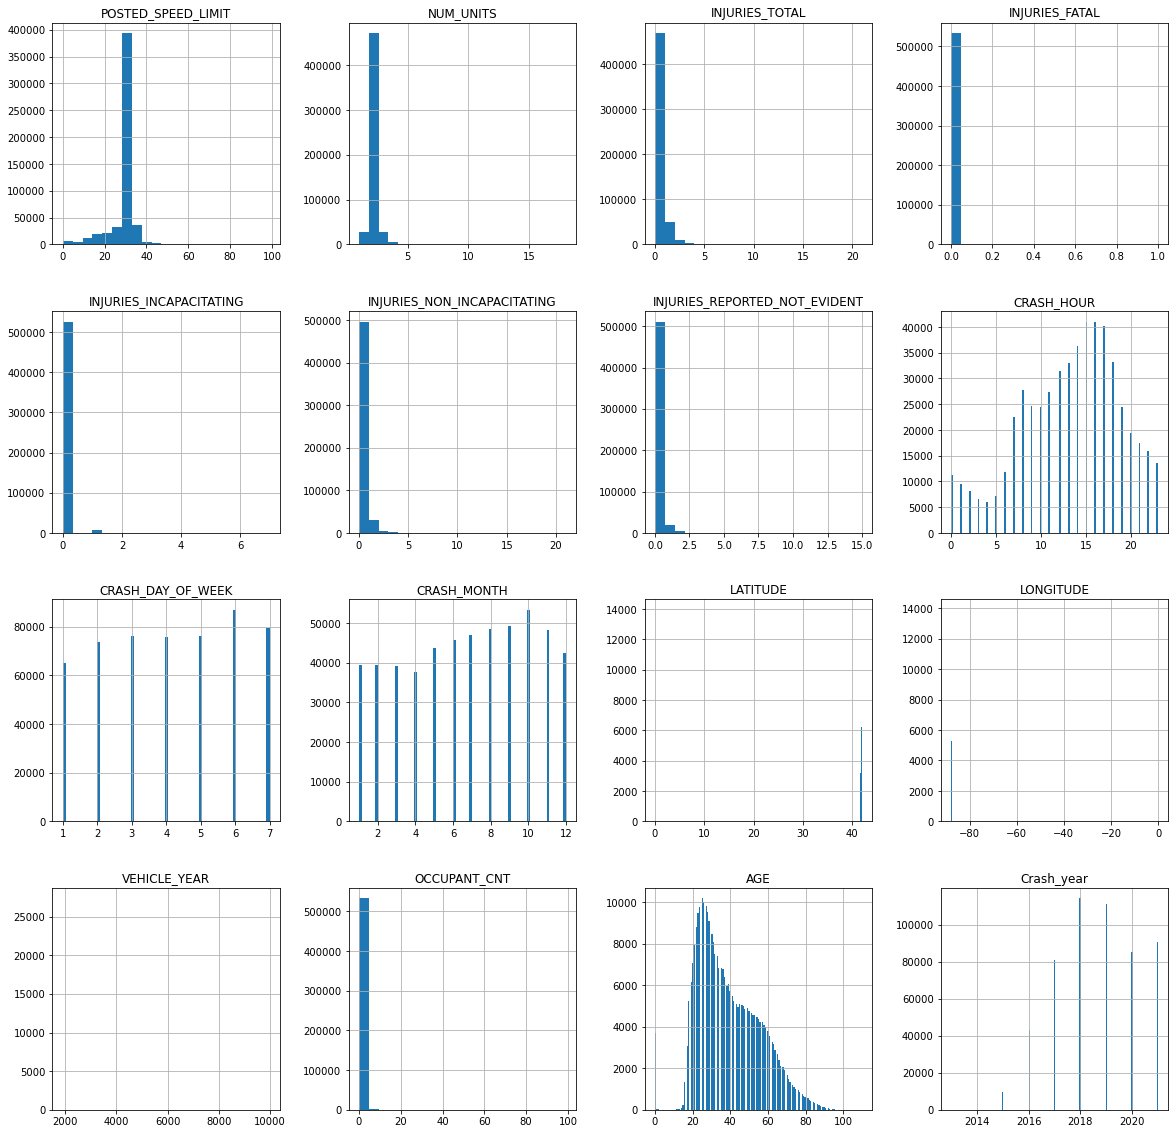

In [52]:
df_driver.hist(figsize=(20,20), bins='auto');

In [53]:
df_driver.INJURIES_FATAL.value_counts()

0.0    533592
1.0       488
Name: INJURIES_FATAL, dtype: int64

# Data Preperation

In [70]:
test_df = df_driver.copy()
test_df = test_df[['AGE', 'CRASH_HOUR', 'POSTED_SPEED_LIMIT', 'INJURIES_FATAL']]
# make columns equal legnth 
test_df = test_df[test_df['AGE'].notna()]

In [71]:
data = test_df[['AGE', 'CRASH_HOUR', 'POSTED_SPEED_LIMIT']].astype('int16')
target = test_df.INJURIES_FATAL.values.astype('int16')

# train-test split

In [72]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.5, random_state=42)

# Decision Tree

In [73]:
tree = DecisionTreeClassifier()

In [74]:
tree_grid = {'max_leaf_nodes': list(range(2, 100)), 
             'min_samples_split': [2, 3, 4],
             'max_depth': [5, 6, 7, 8, 9],
            }

In [75]:
tree_grid_search = GridSearchCV(tree, tree_grid, cv=5)

In [ ]:
tree_grid_search.fit(data_train, target_train)

In [ ]:
tree_grid_search.best_params_

In [ ]:
tree_grid_search.best_score_

In [ ]:
tree_grid_search.best_estimator_.score(data_test, target_test)

In [ ]:
tree_cv_df = pd.DataFrame(tree_grid_search.cv_results_)
tree_cv_df.head()

In [ ]:
best_tree = tree_grid_search.best_estimator_

In [ ]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [ ]:
plot_feature_importances(best_tree)

# Random Forest

In [ ]:
forest = RandomForestClassifier()

In [ ]:
# Number of trees in random forest
# n_estimators = [100,150,200]

# The number of features to consider when looking for the best split
max_features = ['sqrt', 'log2']

# function to measure the quality of a split
criteria = ['gini', 'entropy']

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
forrest_grid = {'max_features': max_features, 
                'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

In [ ]:
forrest_grid_search = GridSearchCV(estimator=forest, param_grid=forrest_grid, cv=5)

In [ ]:
forrest_grid_search.fit(data_train, target_train)

In [ ]:
forrest_grid_search.best_params_

In [ ]:
forrest_grid_search.best_score_

In [ ]:
forrest_grid_search.best_estimator_.score(data_test, target_test)

In [ ]:
forest_cv_df = pd.DataFrame(forrest_grid_search.cv_results_)
forest_cv_df.head()

In [ ]:
best_forest = forrest_grid_search.best_estimator_

In [ ]:
plot_feature_importances(best_forest)

# map

In [ ]:
map_df = df_driver[:100]

In [ ]:
map_center = [map_df.LATITUDE.mean(), map_df.LONGITUDE.mean()]

crash_map = folium.Map(location=map_center, zoom_start=10, control_scale=True)

for index, location_info in map_df.iterrows():
    folium.Marker([location_info["LATITUDE"], location_info["LONGITUDE"]], popup=location_info["INJURIES_FATAL"]).add_to(crash_map)

In [69]:
crash_map